# SPARC-4 products
***

This notebook shows an example for viewing and accessing the SPARC4 data products.

* Eder Martioli, LNA 18 Apr 2024

In [1]:
from astropy.io import fits, ascii
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import sparc4.product_plots as s4plt
import sparc4.pipeline_lib as s4pipelib

### Set paths to example files 
Below we set the paths to example files, which are sparc4-pipeline products obtained from the reduction of data in the [minidata package](https://drive.google.com/file/d/1tAVjyhYGMDcrU5sDdGCmd_f5HoazZ294/view?usp=drive_link).

In [2]:
db_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_sparc4acs1_db.csv'

phot_lightcurve_example ='/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_v1025cen_POLAR_L4_S+N_lc.fits'

polar_stack_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits'

polar_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits'

polar_time_series_example = '/media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_v1025cen_POLAR_L4_ts.fits'

# DB product example
***
In this simple example, we just read the database created by the `sparc4-pipelin` and print it as a pandas table. It's an easy way to quickly access the log of observations.

In [3]:
db = ascii.read(db_example)
pd.DataFrame(np.array(db))

,FILE,DATE-OBS,EXPTIME,RA,DEC,OBJECT,OBSTYPE,INSTMODE,CHANNEL,VBIN,...,VCLKAMP,CCDSERN,PREAMP,READRATE,EMMODE,EMGAIN,WPPOS,WPSEL,CALW,ASEL
0,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:36.946000,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
1,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:38.066073,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
2,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:39.186146,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
3,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:40.306219,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
4,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-02-28T21:24:41.426291,0.00001,0,0,ZERO,ZERO,PHOT,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,0,None,None,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1068,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:01:58.220000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,1,L4,None,True
1069,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:03:40.641000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,2,L4,None,True
1070,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:05:23.164000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,3,L4,None,True
1071,/media/fernando/KINGSTON/Doutorado/2025/202502...,2025-03-01T08:07:05.764000,100.00000,12:38:16.18,-38:42:45.60,V1025 Cen,OBJECT,POLAR,1,1,...,Normal,9914,Gain 2,1.0,Conventional,2,4,L4,None,True


# POLAR products example
***
In this example we show how to work with the polarimetric products of SPARC4

We start by reading the science image FITS file and showing its information. 

In [4]:
hdul = fits.open(polar_stack_example)
hdul.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_stack.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     169   (1024, 1024)   float64   
  1  CATALOG_POL_S_AP005    1 TableHDU        51   56R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  2  CATALOG_POL_N_AP005    1 TableHDU        51   56R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  3  CATALOG_POL_S_AP008    1 TableHDU        51   56R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  4  CATALOG_POL_N_AP008    1 TableHDU        51   56R x 13C   [I11, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, D25.17, I11, I11]   
  5  CATALOG_POL_S_AP010    1 TableHDU        51   56R x 13C   [I11, D25.17,

Then we plot the science frame using the `sparc4.product_plots` library

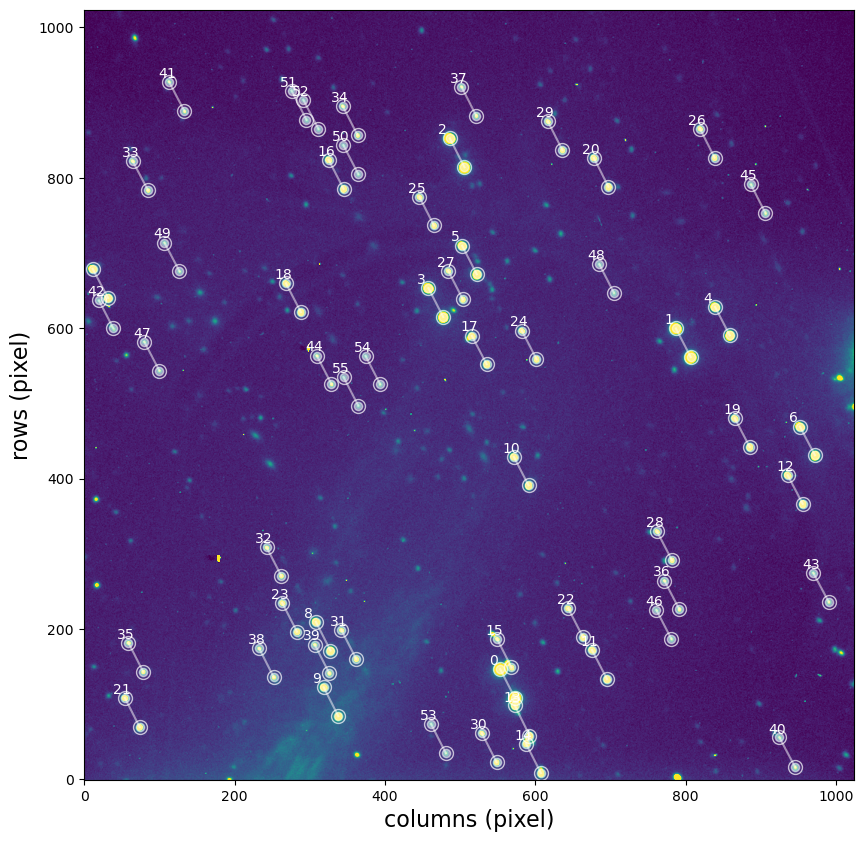

In [5]:
s4plt.plot_sci_polar_frame(polar_stack_example)

Now print one of the catalogs to see its contents

In [6]:
catalog = 'CATALOG_POL_N_AP010'
pd.DataFrame(hdul[catalog].data)

,SRCINDEX,RA,DEC,X,Y,FWHMX,FWHMY,MAG,EMAG,SKYMAG,ESKYMAG,APER,FLAG
0,0,189.553089,-38.759728,572.920633,108.061444,5.545138,5.545138,-9.592915,0.001493,-7.984947,0.001095,10,0
1,1,189.527410,-38.716371,806.569392,561.651808,5.982439,5.982439,-9.301064,0.001767,-7.972832,0.001140,10,0
2,2,189.564743,-38.693900,505.789921,814.020268,5.725746,5.725746,-9.106334,0.001983,-7.956598,0.001175,10,0
3,3,189.567128,-38.712668,477.490583,614.918426,5.758386,5.758386,-8.724413,0.002556,-7.982764,0.001375,10,0
4,4,189.521310,-38.713484,858.558297,590.445061,5.967441,5.967441,-8.112938,0.003833,-7.975169,0.001214,10,0
5,5,189.562051,-38.707199,522.113764,671.678501,5.651021,5.651021,-7.956199,0.004274,-7.981230,0.001130,10,0
6,6,189.506963,-38.727928,971.898680,430.985633,6.063019,6.063019,-7.887267,0.004600,-7.986151,0.001427,10,0
7,7,189.620788,-38.712011,31.842008,640.187673,5.516588,5.516588,-7.772757,0.004807,-7.959362,0.000953,10,0
8,8,189.582822,-38.754796,327.544086,171.320867,5.373293,5.373293,-7.402938,0.006874,-8.020360,0.001613,10,0
9,9,189.581126,-38.762903,337.998551,83.982259,5.380783,5.380783,-6.945423,0.010678,-8.060599,0.002007,10,0


Below we select the source with index number 3 assigned as the main target to be analyzed. Then we select three other stars with indices 0, 1, and 2, as comparisons for differential photometry. All indices are displayed in the image above.  

After selecting the stars we use the function `s4plt.plot_light_curve` to produce plots of the lightcurve data.

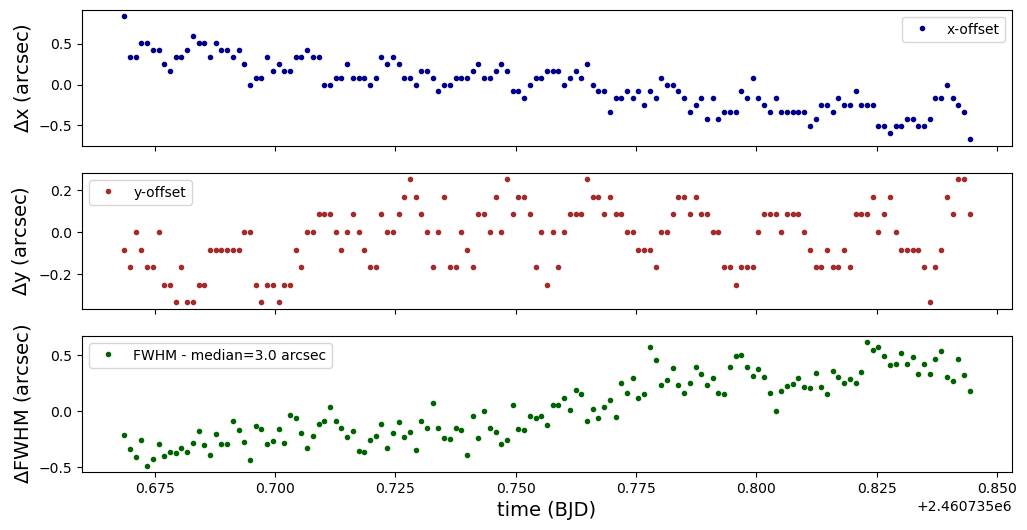

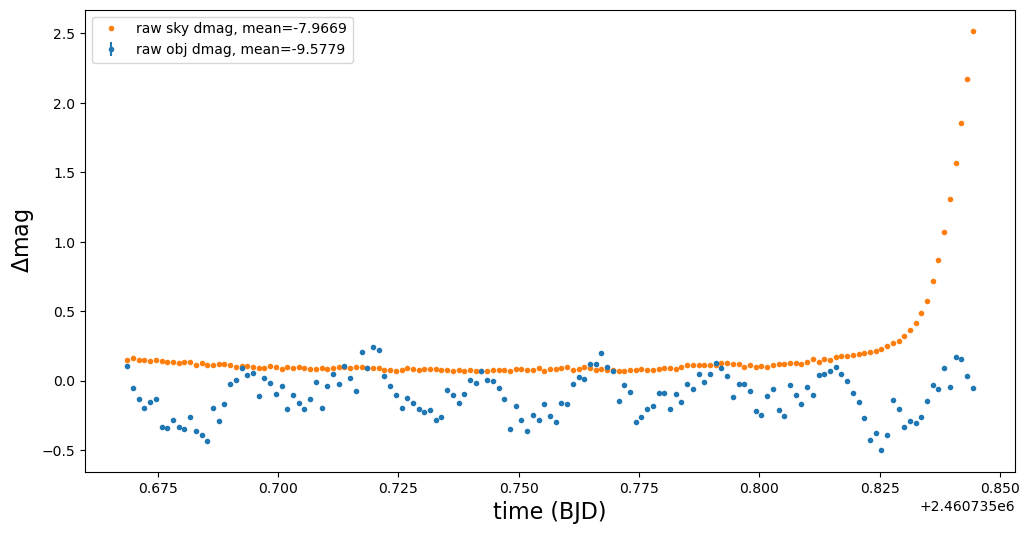

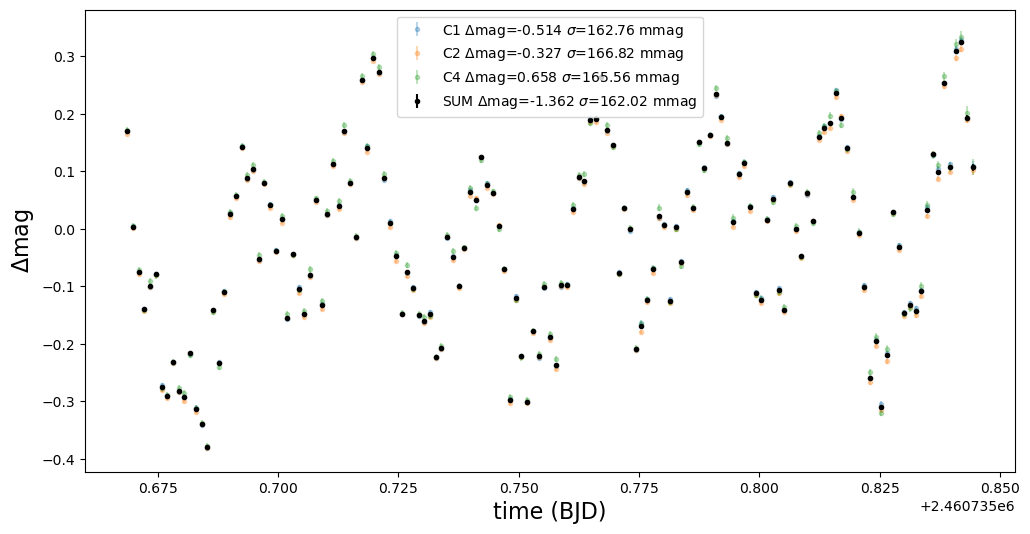

       TIME                x         ...      diffmagsum     
------------------ ----------------- ... --------------------
2460735.6686870405 467.7018807360626 ...   0.1693200082696702
 2460735.669873433 466.2018807360626 ... 0.003957810840168108
 2460735.671059039 466.2018807360626 ... -0.07525194947805147
2460735.6722442624 466.7018807360626 ... -0.13984931481121343
 2460735.673429231 466.7018807360626 ... -0.09916862302373985
 2460735.674614536 466.4518807360626 ... -0.07906608704779927
 2460735.675799759 466.4518807360626 ...   -0.275162290169094
               ...               ... ...                  ...
2460735.8371984144 464.7018807360626 ...  0.09963352248724178
  2460735.83838403 464.7018807360626 ...   0.2536202260376257
 2460735.839571891 465.2018807360626 ...   0.1071976207206955
 2460735.840757391 464.7018807360626 ...  0.30867061975980903
2460735.8419440715 464.4518807360626 ...    0.324541168466828
2460735.8431316433 464.2018807360626 ...  0.19347383488248582
 2460735

In [7]:
catalog = 'CATALOG_PHOT_AP010'
target=3
comps=[1,2,4]

lc = s4plt.plot_light_curve(phot_lightcurve_example, target=target, comps=comps, nsig=10,
                            plot_coords=True, plot_rawmags=True, plot_sum=True,
                            plot_comps=True, catalog_name=catalog)

print(lc)

Now we open a polarimetry FITS product and print its basic information

In [8]:
polar = fits.open(polar_example)
polar.info()

Filename: /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     921   ()      
  1  POLARIMETRY_AP005    1 BinTableHDU   1274   56R x 631C   [D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 

Below we print one of the catalog extensions

In [9]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data)

,APERINDEX,APER,SRCINDEX,RA,DEC,X1,Y1,X2,Y2,FWHM,...,FE0146,EFE0146,FO0147,EFO0147,FE0147,EFE0147,FO0148,EFO0148,FE0148,EFE0148
0,2.0,10.0,0.0,189.553089,-38.759728,553.337698,146.479401,572.920633,108.061444,6.096233,...,7602.887456,23.663676,6311.755737,25.524977,7609.138522,26.584412,6273.896124,29.170550,7596.036521,30.131622
1,2.0,10.0,1.0,189.527410,-38.716371,786.969494,599.629073,806.569392,561.651808,6.580775,...,5477.084210,21.895307,4745.304169,25.435197,5589.180879,25.403904,4758.156296,29.209419,5546.871110,28.973034
2,2.0,10.0,2.0,189.564743,-38.693900,486.320068,852.381391,505.789921,814.020268,6.282421,...,4698.282450,21.723245,3997.920043,24.111347,4718.483622,24.346196,4021.944621,28.014703,4715.980747,28.417933
3,2.0,10.0,3.0,189.567128,-38.712668,457.913178,653.131995,477.490583,614.918426,6.281104,...,4475.642310,21.793566,3638.869157,24.485537,4044.310953,24.806462,3354.872945,28.288502,3746.925042,28.396664
4,2.0,10.0,4.0,189.521310,-38.713484,839.096384,628.239365,858.558297,590.445061,6.529773,...,1867.952486,21.664426,1582.790910,25.031288,1898.377752,25.043309,1600.149421,28.965198,1910.393542,29.064625
5,2.0,10.0,5.0,189.562051,-38.707199,502.680731,709.653210,522.113764,671.678501,6.196682,...,1618.767055,21.928629,1385.472692,23.867872,1626.142136,24.269633,1413.414101,28.210659,1648.037033,28.614129
6,2.0,10.0,6.0,189.506963,-38.727928,951.896969,469.138777,971.898680,430.985633,6.560158,...,1468.602301,21.769607,1267.760014,24.539469,1433.808854,24.320349,1269.904696,28.966192,1464.859645,28.679111
7,2.0,10.0,7.0,189.620788,-38.712011,11.331722,678.865909,31.842008,640.187673,6.026986,...,1177.704871,20.289895,1108.710740,22.351949,1215.019873,23.027636,1084.119970,25.320887,1205.031619,26.905704
8,2.0,10.0,8.0,189.582822,-38.754796,308.125308,209.492708,327.544086,171.320867,5.884087,...,966.957519,21.148035,834.601070,24.182769,946.070549,24.115306,861.242407,28.176456,941.791121,28.423137
9,2.0,10.0,9.0,189.581126,-38.762903,318.558419,122.475164,337.998551,83.982259,6.008168,...,672.860298,21.236512,573.864180,24.255637,689.584374,24.108250,536.947091,28.212347,690.085879,28.227458


Then we can print all column names to check the data available in each catalog

In [10]:
pd.DataFrame(polar["POLARIMETRY_AP010"].data).columns

Index(['APERINDEX', 'APER', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2',
       'FWHM',
       ...
       'FE0146', 'EFE0146', 'FO0147', 'EFO0147', 'FE0147', 'EFE0147', 'FO0148',
       'EFO0148', 'FE0148', 'EFE0148'],
      dtype='object', length=631)

Finally, we can select the source of interest (in this case index=0) and then we get the polarimetry results using the function `get_polarimetry_results` from `sparc4.pipeline_lib` library:

2025-09-18 00:50:25,064 astropop - INFO - Normalization disabled.  [__init__]


2025-09-18 00:50:25,064 | INFO | Normalization disabled.


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/_deriv.py:29: RuntimeWarning: invalid value encountered in log
  return np.log(x)*np.power(x, y)
2025-09-18 00:50:25,076 root - INFO - Source index: i=3   [pipeline_lib]


2025-09-18 00:50:25,076 | INFO | Source index: i=3 


2025-09-18 00:50:25,077 root - INFO - Source RA=189.5671276157065 Dec=-38.71266801258767 mag=-15.0161+-0.0002  [pipeline_lib]


2025-09-18 00:50:25,077 | INFO | Source RA=189.5671276157065 Dec=-38.71266801258767 mag=-15.0161+-0.0002


2025-09-18 00:50:25,077 root - INFO - Best aperture radius: 10.0 pixels  [pipeline_lib]


2025-09-18 00:50:25,077 | INFO | Best aperture radius: 10.0 pixels


2025-09-18 00:50:25,078 root - INFO - Polarization in Q: -0.0069+-0.0005  [pipeline_lib]


2025-09-18 00:50:25,078 | INFO | Polarization in Q: -0.0069+-0.0005


2025-09-18 00:50:25,079 root - INFO - Polarization in U: -0.0009+-0.0009  [pipeline_lib]


2025-09-18 00:50:25,079 | INFO | Polarization in U: -0.0009+-0.0009


2025-09-18 00:50:25,080 root - INFO - Polarization in V: -0.0004+-0.0004  [pipeline_lib]


2025-09-18 00:50:25,080 | INFO | Polarization in V: -0.0004+-0.0004


2025-09-18 00:50:25,081 root - INFO - Total linear polarization p: 0.0069+-0.0005  [pipeline_lib]


2025-09-18 00:50:25,081 | INFO | Total linear polarization p: 0.0069+-0.0005


2025-09-18 00:50:25,082 root - INFO - Angle of polarization theta: 94+-2 deg  [pipeline_lib]


2025-09-18 00:50:25,082 | INFO | Angle of polarization theta: 94+-2 deg


/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: divide by zero encountered in log10
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: invalid value encountered in cast
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
/home/fernando/anaconda3/lib/python3.12/site-packages/astropop/math/physical.py:99: RuntimeWarning: overflow encountered in scalar negative
  return -np.int_(np.floor(np.log10(np.abs(std)))) + sig - 1
2025-09-18 00:50:25,083 root - INFO - Free constant k: 0.9106687614959527+-0.0  [pipeline_lib]


2025-09-18 00:50:25,083 | INFO | Free constant k: 0.9106687614959527+-0.0


2025-09-18 00:50:25,083 root - INFO - Zero of polarization: 28.2+-0.0  [pipeline_lib]


2025-09-18 00:50:25,083 | INFO | Zero of polarization: 28.2+-0.0


2025-09-18 00:50:25,084 root - INFO - RMS of zi residuals: 0.004073794459751174  [pipeline_lib]


2025-09-18 00:50:25,084 | INFO | RMS of zi residuals: 0.004073794459751174


2025-09-18 00:50:25,085 root - INFO - Reduced chi-square (n=149.0, DOF=146.0): 2.42  [pipeline_lib]


2025-09-18 00:50:25,085 | INFO | Reduced chi-square (n=149.0, DOF=146.0): 2.42


/home/fernando/anaconda3/lib/python3.12/site-packages/numpy/core/numeric.py:407: RuntimeWarning: invalid value encountered in cast
  multiarray.copyto(res, fill_value, casting='unsafe')
2025-09-18 00:50:25,173 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:50:25,173 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:50:25,180 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:50:25,180 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:50:25,415 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:50:25,415 | INFO | Substituting symbol \perp from STIXGeneral


2025-09-18 00:50:25,420 matplotlib.mathtext - INFO - Substituting symbol \perp from STIXGeneral  [_mathtext]


2025-09-18 00:50:25,420 | INFO | Substituting symbol \perp from STIXGeneral


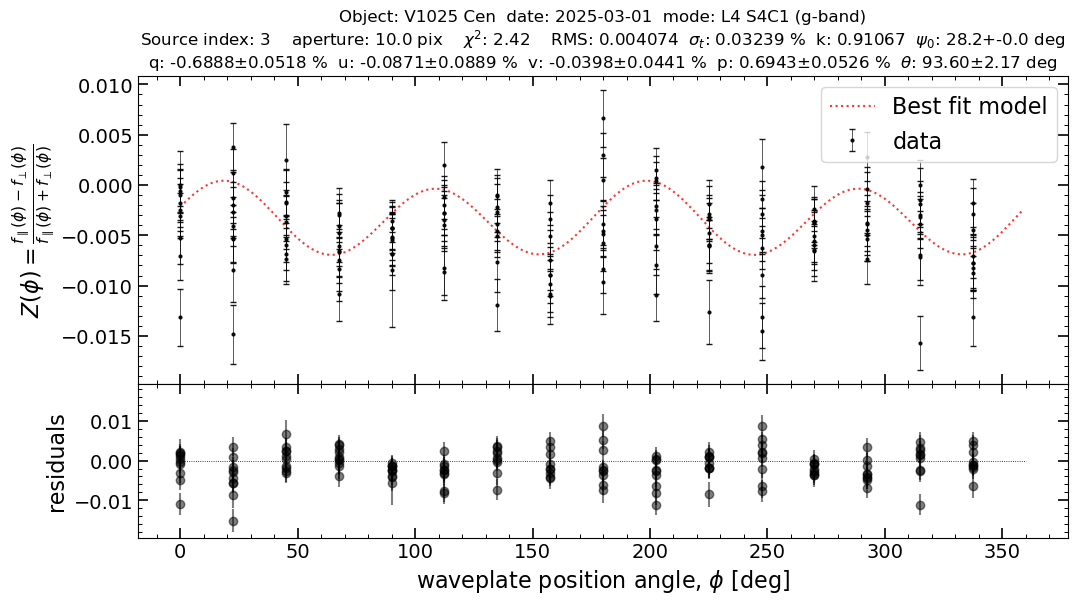

In [11]:
source_index = 3

pol_results = s4pipelib.get_polarimetry_results(polar_example,
                                                source_index=source_index,
                                                min_aperture=5,
                                                max_aperture=21,
                                                plot=True,
                                                verbose=True)

Below we print all variables names for the measurements available in the polar product

In [12]:
for key in pol_results.keys():
    print(key, ":", pol_results[key])

POLAR_PRODUCT : /media/fernando/KINGSTON/Doutorado/2025/reduced/20250228/sparc4acs1/20250228_s4c1_Gain2_1.0_Conventional_2_v1025cen_POLAR_L4_polar.fits
SOURCE_INDEX : 3
POLARIMETRY_SUCCESS : True
APERTURE_INDEX : 3
APERTURE_RADIUS : 10.0
NEXPS : 149
MAG : -15.0161+-0.0002
RA : 189.5671276157065
DEC : -38.71266801258767
FWHM : 6.281103621618064
X1 : 457.91317844232697
Y1 : 653.131994751359
X2 : 477.49058302979824
Y2 : 614.9184262293344
WAVEPLATE_ANGLES : [  0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  202.5 225.  247.5 270.  292.5 315.  337.5
   0.   22.5  45.   67.5  90.  112.5 135.  157.5 180.  202.5 225.  247.5
 270.  292.5 315.  337.5   0.   22.5  45.   67.5  90.  112.5 135.  157.5
 180.  202.5 225.  247.5 270.  292.5 315.  337.5   0.   22.5  45.   67.5
  90.  112.5 135.  157.5 180.  

And below we show a simple example how to get one of these measurements out. For instance, we're getting the total polarization and the polarization angle. 

In [13]:
p = pol_results["P"]*100
pa = pol_results["THETA"]
print("Polarization: {} %  Angle of polarization: {} deg".format(p,pa) )

Polarization: 0.69+-0.05 %  Angle of polarization: 94+-2 deg deg


Finally, we show below an example of a polarimetric time series product. 

In [14]:
polar_ts = fits.open(polar_time_series_example)
pd.DataFrame(polar_ts[1].data)

ValueError: Big-endian buffer not supported on little-endian compiler

ValueError: Big-endian buffer not supported on little-endian compiler

In [15]:
pd.DataFrame(polar_ts[1].data).columns

Index(['TIME', 'SRCINDEX', 'RA', 'DEC', 'X1', 'Y1', 'X2', 'Y2', 'FWHM', 'MAG',
       'EMAG', 'Q', 'EQ', 'U', 'EU', 'V', 'EV', 'P', 'EP', 'THETA', 'ETHETA',
       'K', 'EK', 'ZERO', 'EZERO', 'NOBS', 'NPAR', 'CHI2', 'RMS', 'TSIGMA'],
      dtype='object')

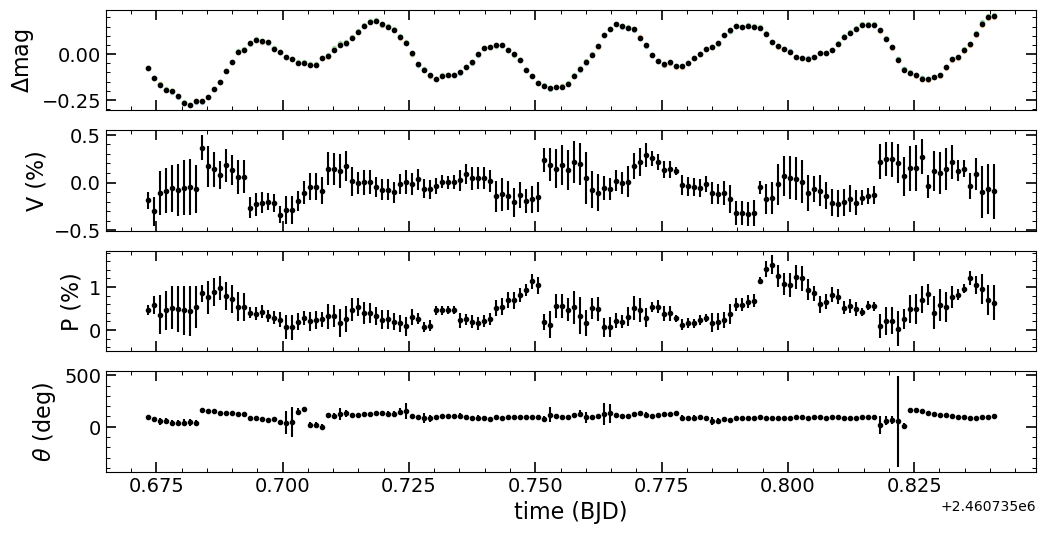

diffmag_C00000,diffmag_err_C00000,diffmag_C00001,diffmag_err_C00001,diffmag_C00002,diffmag_err_C00002,TIME,x1,y1,x2,y2,fwhm,mag,mag_err,magsum,magsum_err,diffmagsum,polarization_1,polarization_1_err,polarization_2,polarization_2_err
float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
-0.07638174115888052,0.0011472695844194807,-0.07570550846465451,0.0011882852950758434,-0.07456659767057605,0.0018773906949952745,2460735.6734164804,457.91317844232697,653.131994751359,477.49058302979824,614.9184262293344,5.520174117565034,-11.789560440056647,0.0009697205519037475,-13.240837768348946,0.001852504093687473,-0.07566848475271382,0.004618691796424352,0.001182424767291005,93.88269883124585,7.321845629687413
-0.13093868946180987,0.001182773479784892,-0.12962687965923614,0.0012229403458905521,-0.12919764576113568,0.0018972237702554685,2460735.674603191,456.41317844232697,652.881994751359,475.99058302979824,614.6684262293344,5.465151815842605,-11.737101267700858,0.0010122820800372758,-13.2427014036817,0.001849283428741511,-0.1299912924412565,0.005804214822270838,0.0021173829676126416,78.62408353194262,10.433306610458846
-0.1677706727021695,0.001206914416784998,-0.16614984090568008,0.001246595753365842,-0.16512761365879935,0.0019113669382328788,2460735.675789468,456.41317844232697,653.381994751359,475.99058302979824,615.1684262293344,5.459516208081311,-11.70180827156447,0.0010414129434298427,-13.243980698706885,0.0018467117257691646,-0.1665635836028292,0.003496619547343401,0.004546517150482199,51.977296753110444,37.18745741228355
-0.19504752464693897,0.001226205719157169,-0.19409233801356152,0.001265327065735165,-0.19226704694458707,0.0019214471008749013,2460735.6769746803,456.91317844232697,653.131994751359,476.49058302979824,614.9184262293344,5.522293506299951,-11.674278146991366,0.0010637275005258373,-13.243963345413192,0.0018444629094431365,-0.19407635488224084,0.004593448167438693,0.004560113462017928,54.82442621046282,28.392449475800774
-0.20510125701519133,0.0012321307218384795,-0.2035984291011097,0.0012705116187613332,-0.20225535197083122,0.0019226462268143551,2460735.6781609682,456.91317844232697,652.881994751359,476.49058302979824,614.6684262293344,5.465151815842605,-11.6657546306217,0.0010711524523566922,-13.245271712931734,0.0018403292297901389,-0.20390823877044806,0.005215223650367405,0.005041775945091006,40.45955094636532,27.64882231262402
-0.23196671089347287,0.0012527780427388484,-0.2313494307314663,0.0012900126645658315,-0.23051531416421422,0.0019324183049757645,2460735.6793474015,456.66317844232697,652.881994751359,476.24058302979824,614.6684262293344,5.584321357115995,-11.638840565399848,0.0010949514302170875,-13.245782228368304,0.001836047412489908,-0.23133281942887063,0.004904698279538187,0.005390268643430212,36.19371935807282,31.431430521475324
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
-0.01634320837218528,0.0013703792280760805,-0.021598650189725177,0.0014202326892400004,-0.01573216173479519,0.0023298006315130466,2460735.833625247,453.91317844232697,653.381994751359,473.49058302979824,615.1684262293344,7.137262912286852,-11.736965924638929,0.0011490599881995376,-13.130688664464586,0.0023155894570246046,-0.01811389628607163,0.00820801939859701,0.001309523765270773,93.37621077852562,4.562900971353188
0.023206560431273893,0.001388046314105511,0.018500908827846274,0.0014406551087029706,0.025799443259031385,0.0024008088807403113,2460735.8348107003,453.91317844232697,653.131994751359,473.49058302979824,614.9184262293344,7.185044074891053,-11.777984814920469,0.0011544792359052107,-13.131636937323144,0.0024015778304620006,0.021956721136910495,0.009626707776882522,0.0010384769706095265,95.00947113045903,3.0852127277359345


In [16]:
s4plt.plot_polar_time_series(polar_time_series_example, 
                             target=3, 
                             comps=[1,2,4], 
                             plot_total_polarization=True, 
                             plot_polarization_angle=True)